In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 :
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어
느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
 - https://www.mql5.com/ko/articles/11200

In [2]:
# 섭씨온도(input data=독립변수)를 화씨온도(target data=종속변수)를 출력
def celsius_to_fahrenheit(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨 온도는?'))
print('화씨온도는', celsius_to_fahrenheit(input_c))

섭씨 온도는?1
화씨온도는 33.8


# 2. 딥러닝/머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습시키기(훈련, 검증데이터셋)
- 6. 모델 평가(시험데이터셋)
- 7. 모델 저장/사용(입력값을 주어지면 예측값을 받기)
## 2.1 노이즈가 없는 데이터 실습

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[]

In [7]:
# 1. 데이터 확보(생성)
data_C = np.arange(100)
data_C # input데이터(독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
data_F = celsius_to_fahrenheit(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [11]:
# 2. 데이터 전처리 : 스케일조정(컴퓨터에게 학습시키기 위해 정규화/표준화 : 전체의 편차를 비슷하게
scaled_data_C = data_C/100
scaled_data_F = data_F/100
print('독립변수 :', scaled_data_C)
print('타겟변수 :', scaled_data_F)

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [17]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Input, Dense # 입력값과 출력값으로 layer층 지정
model = Sequential()
model.add(Input(shape=(1,))) # 입력(독립)변수의 shape
model.add(Dense(1)) # 타겟(종속, 출력)변수의 갯수
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 4. 모델 학습 과정 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
#                손실함수           옵티마이저          평가지표

In [21]:
# 학습전 예측
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 20ms/step


array([[ 0.        ],
       [-0.01230828]], dtype=float32)

In [22]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [23]:
# 5. 모델 학습시키기 - 셀1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)
            # 독립변수(훈련data) 타겟변수(훈련data) 학습횟수  학습시출력여부

Epoch 1/1000
4/4 - 0s - loss: 4.0611 - mae: 1.8158 - 384ms/epoch - 96ms/step
Epoch 2/1000
4/4 - 0s - loss: 4.0160 - mae: 1.8044 - 12ms/epoch - 3ms/step
Epoch 3/1000
4/4 - 0s - loss: 3.9837 - mae: 1.7961 - 5ms/epoch - 1ms/step
Epoch 4/1000
4/4 - 0s - loss: 3.9592 - mae: 1.7900 - 8ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 3.9319 - mae: 1.7829 - 5ms/epoch - 1ms/step
Epoch 6/1000
4/4 - 0s - loss: 3.9064 - mae: 1.7763 - 9ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 3.8849 - mae: 1.7709 - 9ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 3.8619 - mae: 1.7649 - 4ms/epoch - 998us/step
Epoch 9/1000
4/4 - 0s - loss: 3.8365 - mae: 1.7583 - 11ms/epoch - 3ms/step
Epoch 10/1000
4/4 - 0s - loss: 3.8128 - mae: 1.7522 - 12ms/epoch - 3ms/step
Epoch 11/1000
4/4 - 0s - loss: 3.7913 - mae: 1.7465 - 6ms/epoch - 1ms/step
Epoch 12/1000
4/4 - 0s - loss: 3.7688 - mae: 1.7405 - 7ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 3.7481 - mae: 1.7351 - 9ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - l

4/4 - 0s - loss: 1.9480 - mae: 1.1820 - 5ms/epoch - 1ms/step
Epoch 110/1000
4/4 - 0s - loss: 1.9331 - mae: 1.1768 - 7ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 1.9186 - mae: 1.1717 - 6ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 1.9032 - mae: 1.1661 - 4ms/epoch - 997us/step
Epoch 113/1000
4/4 - 0s - loss: 1.8870 - mae: 1.1603 - 6ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 1.8714 - mae: 1.1548 - 7ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 1.8568 - mae: 1.1495 - 6ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 1.8426 - mae: 1.1445 - 4ms/epoch - 997us/step
Epoch 117/1000
4/4 - 0s - loss: 1.8264 - mae: 1.1387 - 3ms/epoch - 748us/step
Epoch 118/1000
4/4 - 0s - loss: 1.8129 - mae: 1.1339 - 5ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.7967 - mae: 1.1279 - 7ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 1.7812 - mae: 1.1223 - 7ms/epoch - 2ms/step
Epoch 121/1000
4/4 - 0s - loss: 1.7687 - mae: 1.1177 - 4ms/epoch - 997us/step
Epoch 122/1000
4/4 

Epoch 216/1000
4/4 - 0s - loss: 0.7202 - mae: 0.6939 - 5ms/epoch - 1ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.7121 - mae: 0.6901 - 4ms/epoch - 997us/step
Epoch 218/1000
4/4 - 0s - loss: 0.7042 - mae: 0.6865 - 8ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.6976 - mae: 0.6834 - 4ms/epoch - 997us/step
Epoch 220/1000
4/4 - 0s - loss: 0.6894 - mae: 0.6796 - 7ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.6836 - mae: 0.6769 - 6ms/epoch - 1ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.6758 - mae: 0.6732 - 10ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.6676 - mae: 0.6693 - 4ms/epoch - 997us/step
Epoch 224/1000
4/4 - 0s - loss: 0.6595 - mae: 0.6654 - 6ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.6545 - mae: 0.6631 - 4ms/epoch - 997us/step
Epoch 226/1000
4/4 - 0s - loss: 0.6471 - mae: 0.6594 - 3ms/epoch - 748us/step
Epoch 227/1000
4/4 - 0s - loss: 0.6407 - mae: 0.6565 - 5ms/epoch - 1ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.6325 - mae: 0.6526 - 6ms/epoch - 1ms/step
E

Epoch 323/1000
4/4 - 0s - loss: 0.2725 - mae: 0.4516 - 6ms/epoch - 1ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.2709 - mae: 0.4504 - 6ms/epoch - 1ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.2701 - mae: 0.4498 - 22ms/epoch - 5ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.2692 - mae: 0.4490 - 5ms/epoch - 1ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.2678 - mae: 0.4479 - 4ms/epoch - 997us/step
Epoch 328/1000
4/4 - 0s - loss: 0.2670 - mae: 0.4473 - 4ms/epoch - 997us/step
Epoch 329/1000
4/4 - 0s - loss: 0.2655 - mae: 0.4461 - 5ms/epoch - 1ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.2645 - mae: 0.4452 - 6ms/epoch - 1ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.2634 - mae: 0.4444 - 7ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.2624 - mae: 0.4436 - 4ms/epoch - 997us/step
Epoch 333/1000
4/4 - 0s - loss: 0.2618 - mae: 0.4430 - 4ms/epoch - 997us/step
Epoch 334/1000
4/4 - 0s - loss: 0.2609 - mae: 0.4423 - 5ms/epoch - 1ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.2601 - mae: 0.4416 - 8ms/epoch - 2ms/step
Epo

Epoch 430/1000
4/4 - 0s - loss: 0.1747 - mae: 0.3613 - 6ms/epoch - 1ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.1738 - mae: 0.3603 - 4ms/epoch - 997us/step
Epoch 432/1000
4/4 - 0s - loss: 0.1731 - mae: 0.3596 - 4ms/epoch - 997us/step
Epoch 433/1000
4/4 - 0s - loss: 0.1722 - mae: 0.3586 - 5ms/epoch - 1ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.1715 - mae: 0.3577 - 4ms/epoch - 997us/step
Epoch 435/1000
4/4 - 0s - loss: 0.1708 - mae: 0.3571 - 5ms/epoch - 1ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.1701 - mae: 0.3564 - 5ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.1694 - mae: 0.3556 - 4ms/epoch - 997us/step
Epoch 438/1000
4/4 - 0s - loss: 0.1687 - mae: 0.3548 - 5ms/epoch - 1ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.1678 - mae: 0.3539 - 4ms/epoch - 997us/step
Epoch 440/1000
4/4 - 0s - loss: 0.1670 - mae: 0.3531 - 9ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.1661 - mae: 0.3521 - 4ms/epoch - 997us/step
Epoch 442/1000
4/4 - 0s - loss: 0.1652 - mae: 0.3511 - 5ms/epoch - 1ms/step


Epoch 537/1000
4/4 - 0s - loss: 0.0994 - mae: 0.2724 - 4ms/epoch - 997us/step
Epoch 538/1000
4/4 - 0s - loss: 0.0988 - mae: 0.2716 - 6ms/epoch - 1ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0983 - mae: 0.2709 - 4ms/epoch - 997us/step
Epoch 540/1000
4/4 - 0s - loss: 0.0978 - mae: 0.2701 - 4ms/epoch - 997us/step
Epoch 541/1000
4/4 - 0s - loss: 0.0971 - mae: 0.2692 - 8ms/epoch - 2ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0966 - mae: 0.2684 - 4ms/epoch - 997us/step
Epoch 543/1000
4/4 - 0s - loss: 0.0961 - mae: 0.2676 - 6ms/epoch - 1ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0956 - mae: 0.2670 - 3ms/epoch - 748us/step
Epoch 545/1000
4/4 - 0s - loss: 0.0949 - mae: 0.2660 - 4ms/epoch - 997us/step
Epoch 546/1000
4/4 - 0s - loss: 0.0944 - mae: 0.2654 - 8ms/epoch - 2ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0937 - mae: 0.2644 - 3ms/epoch - 748us/step
Epoch 548/1000
4/4 - 0s - loss: 0.0931 - mae: 0.2635 - 8ms/epoch - 2ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0925 - mae: 0.2627 - 4ms/epoch - 997us/s

Epoch 644/1000
4/4 - 0s - loss: 0.0454 - mae: 0.1839 - 5ms/epoch - 1ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0450 - mae: 0.1831 - 6ms/epoch - 1ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0445 - mae: 0.1821 - 5ms/epoch - 1ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0442 - mae: 0.1814 - 4ms/epoch - 997us/step
Epoch 648/1000
4/4 - 0s - loss: 0.0438 - mae: 0.1804 - 5ms/epoch - 1ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0434 - mae: 0.1797 - 4ms/epoch - 997us/step
Epoch 650/1000
4/4 - 0s - loss: 0.0430 - mae: 0.1788 - 9ms/epoch - 2ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0426 - mae: 0.1781 - 4ms/epoch - 997us/step
Epoch 652/1000
4/4 - 0s - loss: 0.0422 - mae: 0.1774 - 5ms/epoch - 1ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0418 - mae: 0.1764 - 4ms/epoch - 997us/step
Epoch 654/1000
4/4 - 0s - loss: 0.0414 - mae: 0.1756 - 4ms/epoch - 997us/step
Epoch 655/1000
4/4 - 0s - loss: 0.0411 - mae: 0.1748 - 6ms/epoch - 1ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0407 - mae: 0.1739 - 4ms/epoch - 997us/step


Epoch 751/1000
4/4 - 0s - loss: 0.0128 - mae: 0.0980 - 5ms/epoch - 1ms/step
Epoch 752/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0972 - 4ms/epoch - 997us/step
Epoch 753/1000
4/4 - 0s - loss: 0.0125 - mae: 0.0965 - 4ms/epoch - 997us/step
Epoch 754/1000
4/4 - 0s - loss: 0.0123 - mae: 0.0959 - 8ms/epoch - 2ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0951 - 7ms/epoch - 2ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0119 - mae: 0.0943 - 6ms/epoch - 1ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0933 - 4ms/epoch - 997us/step
Epoch 758/1000
4/4 - 0s - loss: 0.0115 - mae: 0.0925 - 4ms/epoch - 997us/step
Epoch 759/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0918 - 4ms/epoch - 997us/step
Epoch 760/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0911 - 7ms/epoch - 2ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0902 - 4ms/epoch - 997us/step
Epoch 762/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0895 - 4ms/epoch - 997us/step
Epoch 763/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0884 - 9ms/epoch - 2ms/ste

Epoch 857/1000
4/4 - 0s - loss: 2.2221e-04 - mae: 0.0129 - 8ms/epoch - 2ms/step
Epoch 858/1000
4/4 - 0s - loss: 2.0118e-04 - mae: 0.0122 - 5ms/epoch - 1ms/step
Epoch 859/1000
4/4 - 0s - loss: 1.7425e-04 - mae: 0.0114 - 8ms/epoch - 2ms/step
Epoch 860/1000
4/4 - 0s - loss: 1.5716e-04 - mae: 0.0108 - 4ms/epoch - 997us/step
Epoch 861/1000
4/4 - 0s - loss: 1.3413e-04 - mae: 0.0100 - 8ms/epoch - 2ms/step
Epoch 862/1000
4/4 - 0s - loss: 1.1807e-04 - mae: 0.0094 - 6ms/epoch - 1ms/step
Epoch 863/1000
4/4 - 0s - loss: 1.0034e-04 - mae: 0.0087 - 9ms/epoch - 2ms/step
Epoch 864/1000
4/4 - 0s - loss: 8.2359e-05 - mae: 0.0078 - 4ms/epoch - 997us/step
Epoch 865/1000
4/4 - 0s - loss: 6.9778e-05 - mae: 0.0072 - 7ms/epoch - 2ms/step
Epoch 866/1000
4/4 - 0s - loss: 5.6449e-05 - mae: 0.0065 - 6ms/epoch - 1ms/step
Epoch 867/1000
4/4 - 0s - loss: 4.7382e-05 - mae: 0.0059 - 8ms/epoch - 2ms/step
Epoch 868/1000
4/4 - 0s - loss: 3.8405e-05 - mae: 0.0053 - 4ms/epoch - 997us/step
Epoch 869/1000
4/4 - 0s - loss: 3.

Epoch 955/1000
4/4 - 0s - loss: 5.4977e-07 - mae: 7.2531e-04 - 4ms/epoch - 997us/step
Epoch 956/1000
4/4 - 0s - loss: 4.5455e-07 - mae: 6.5736e-04 - 4ms/epoch - 997us/step
Epoch 957/1000
4/4 - 0s - loss: 8.2883e-07 - mae: 8.9405e-04 - 6ms/epoch - 1ms/step
Epoch 958/1000
4/4 - 0s - loss: 1.1050e-06 - mae: 9.8045e-04 - 5ms/epoch - 1ms/step
Epoch 959/1000
4/4 - 0s - loss: 5.1666e-08 - mae: 2.2288e-04 - 9ms/epoch - 2ms/step
Epoch 960/1000
4/4 - 0s - loss: 9.0252e-08 - mae: 2.8837e-04 - 4ms/epoch - 997us/step
Epoch 961/1000
4/4 - 0s - loss: 1.0002e-06 - mae: 9.5621e-04 - 4ms/epoch - 997us/step
Epoch 962/1000
4/4 - 0s - loss: 9.1243e-07 - mae: 9.0512e-04 - 7ms/epoch - 2ms/step
Epoch 963/1000
4/4 - 0s - loss: 2.0435e-07 - mae: 4.3954e-04 - 4ms/epoch - 997us/step
Epoch 964/1000
4/4 - 0s - loss: 3.9853e-07 - mae: 6.0925e-04 - 4ms/epoch - 997us/step
Epoch 965/1000
4/4 - 0s - loss: 1.0953e-06 - mae: 0.0010 - 4ms/epoch - 997us/step
Epoch 966/1000
4/4 - 0s - loss: 2.3271e-07 - mae: 4.6951e-04 - 6ms

In [25]:
# 6. 모델 과정 시각화
hist.history.keys()

dict_keys(['loss', 'mae'])

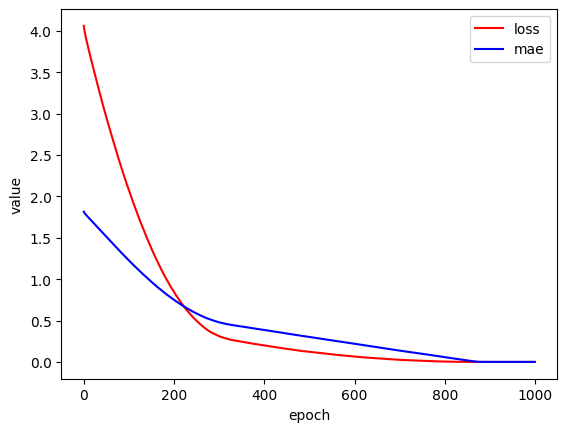

In [30]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [31]:
# 7. 모델 사용/저장
model.predict(np.array([[0],
                        [0.01],
                        [0.02]]))

1/1 [==============================] - 0s 24ms/step


array([[0.32021484],
       [0.33821595],
       [0.3562171 ]], dtype=float32)

In [32]:
model.save('model/after_learning.h5')

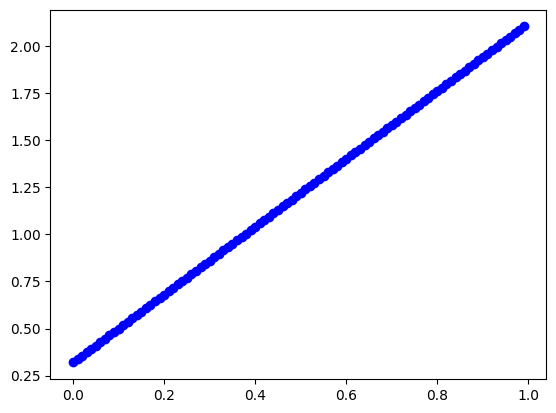

In [33]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')

In [37]:
y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat[::20], scaled_data_F[::20]):
    print(h, y)

4/4 [==============================] - 0s 1ms/step
[0.32021484] 0.32
[0.6802372] 0.68
[1.0402595] 1.04
[1.4002819] 1.4
[1.7603042] 1.76


In [ ]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')